<h3 align=center>**Health care: Heart attack possibility**</h3>

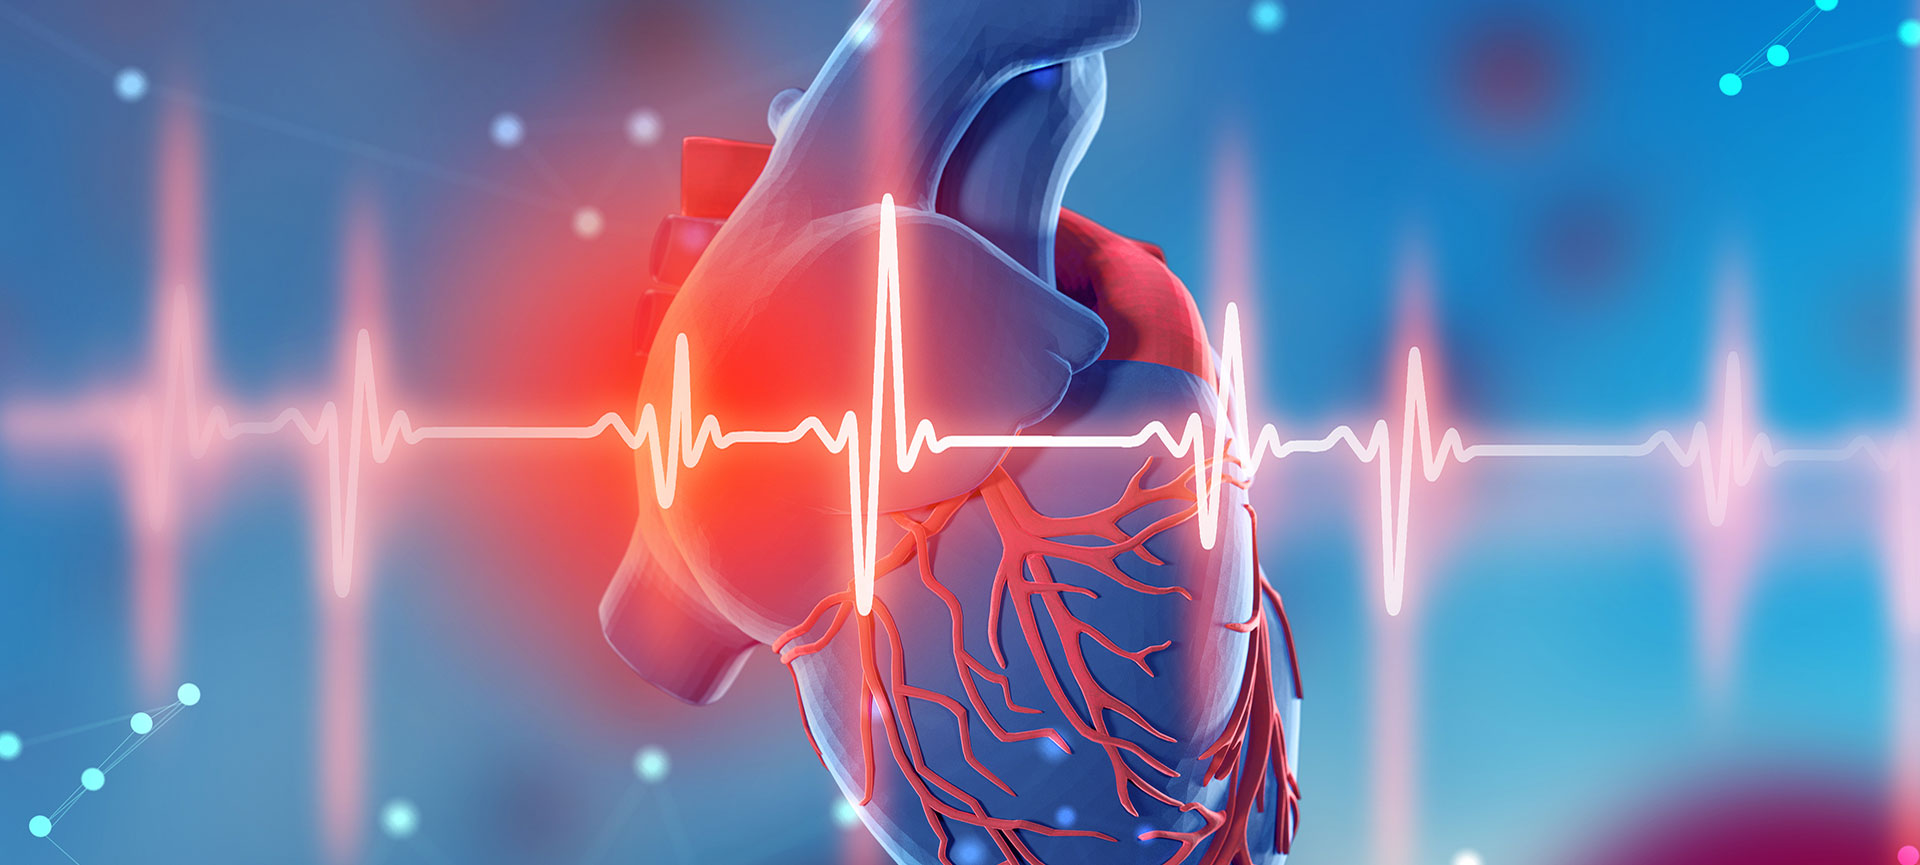

### About the Dataset:

Cette base de données contient 76 attributs, mais toutes les expériences publiées font référence à l'utilisation d'un sous-ensemble de 14 d'entre eux. En particulier, la base de données de Cleveland est la seule qui ait été utilisée par les chercheurs ML à ce jour.
Le champ "Target" fait référence à la présence d'une maladie cardiaque chez le patient. Il s'agit d'un nombre entier dont la valeur est 0 = aucune/peu de chance de crise cardiaque et 1 = plus de chance de crise cardiaque.
Cette étude a été éffectuée sur des personnes de sexe feminin valeur 0 et masculin valeur 1 de tout âge.


**Source Information:**

   (a) Creators: 
       -- 1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
       -- 2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
       -- 3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
       -- 4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:
             Robert Detrano, M.D., Ph.D.

   (b) Donor: David W. Aha (aha@ics.uci.edu) (714) 856-8779   
   
   (c) Date: July, 1988
   

**Attribute Information**:


- Target (0 = aucune/peu de chance de crise cardiaque, 1 = plus de chance de crise cardiaque)
- Sex (0-> femme, 1-> male)



1. age
2. sex
3. cp: type de douleur thoracique (4 valeurs)
4. trestbps: pression artérielle au repos 
5. chol: cholestérol sérique en mg/dl
6. fbs: glycémie à jeun > 120 mg/dl
7. restecg: résultats électrocardiographiques au repos (valeurs 0,1,2)
8. thalach:  Fréquence cardiaque maximale atteinte
9. exang: angine de poitrine à l'effort
10. oldpeak: dépression ST induite par l'exercice par rapport au repos
11. slop: la pente du segment ST de pointe à l'effort
12. ca: nombre de vaisseaux principaux (0-3) colorés par la flourosopie
13. thal: 0= normal ; 1 = défaut fixe ; 2 = défaut réversible 
14. target: 0= moins de risque de crise cardiaque 1= plus de risque de crise cardiaque

Source des données : https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Missing attribute values: none

Class distribution: 165 risque d'infractus , 138 moins de risque

### Task 1: Chargement des bibliothèques et des données

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import time
import missingno as msno

In [ ]:
heart = pd.read_csv("heart.csv")

<h2 align=center> Analyse exploratoire des données </h2>

---

### Task 2: Séparer la cible des caractéristiques


In [ ]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# La colonne Target (1 pour Y 0 pour N )
Y,N = heart.target.value_counts() 
print(Y,N)

165 138


In [ ]:
heart.shape

(303, 14)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


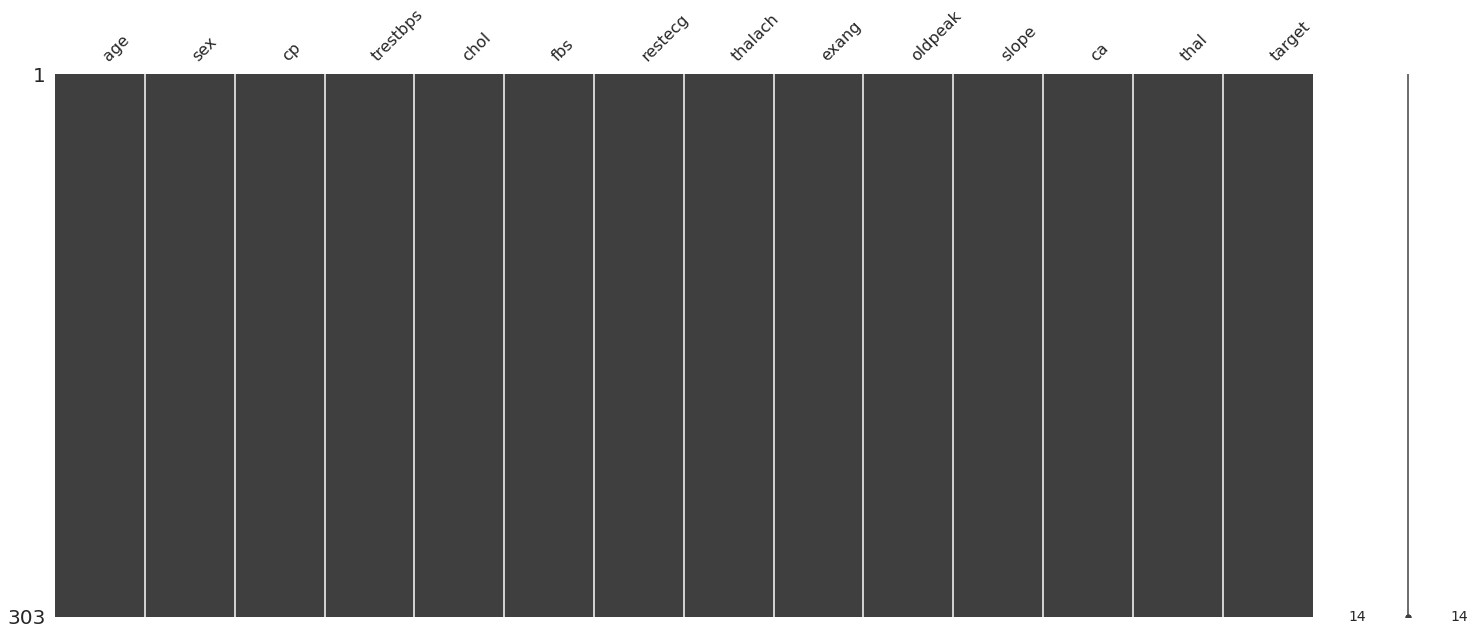

In [ ]:
!pip install missingno
import missingno as msno
msno.matrix(heart)

In [ ]:
# feature names as a list
col = heart.columns       # .columns gives columns names in heart 
print(col)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [ ]:
# y includes our labels and x includes our features
y = heart.target
list = ['target']# cree une liste d'un element
x = heart.drop(list,axis = 1 )# on drop la liste
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


### Tâche 3: Visualisation de la distribution des diagnotiques

Nombre atteint infarctus:  165
Nombre bien portant:  138


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



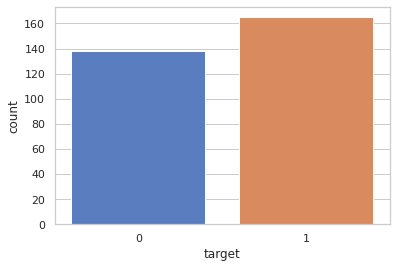

In [ ]:
# Affiche le nombre personnes susceptible  d'avoir l'infarctus et celles ayant le moins risque( Y pour 1 et N pour 0)
ax = sns.countplot(y,label="Count")
Y,N = y.value_counts()
print('Nombre atteint infarctus: ',Y)
print('Nombre bien portant: ', N)

In [ ]:
x.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


<h2 align=center> Visualisation des données </h2>

---

### Tâche 4: Visualisation des données normalisées avec Seaborn

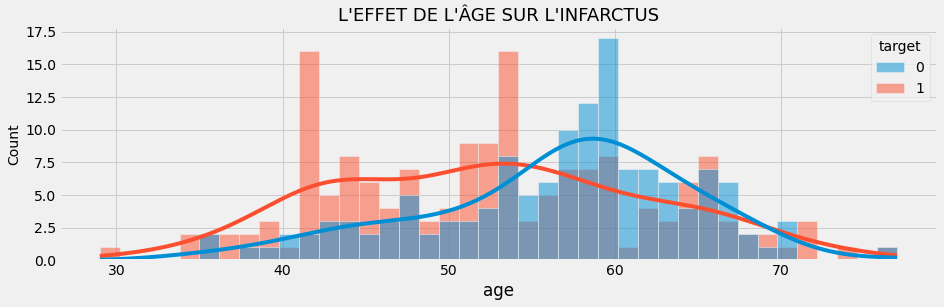

**Selon la representation graphique il n'y a aucune relation entre l'äge et une attaque cardiaque.**


In [ ]:
plt.figure(figsize=(14, 4))
sns.histplot(data= heart, x='age',hue='target', bins=40, kde=True);
plt.title("L'EFFET DE L'ÂGE SUR L'INFARCTUS",fontsize=18)
plt.ylabel("Count",fontsize=14)
plt.show();

print("**Selon la representation graphique il n'y a aucune relation entre l'äge et une attaque cardiaque.**")

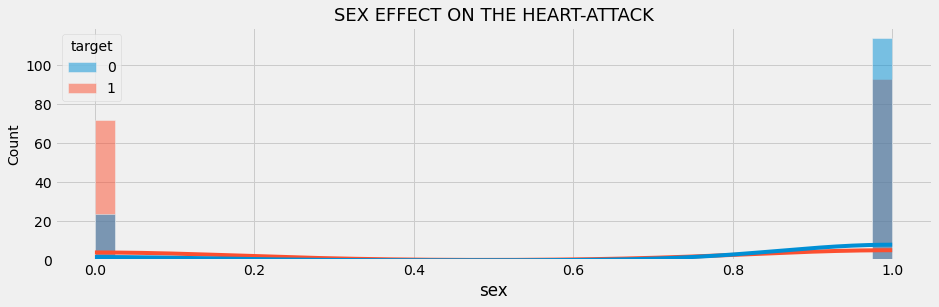

**Les femmes sont plus susecptibles de faire un arrêt cardiaque que les hommes.**


In [ ]:
#  SEX(1-> male 0-> female)
plt.figure(figsize=(14, 4))
sns.histplot(data= heart, x='sex', hue='target', bins=40, kde=True);
plt.title("SEX EFFECT ON THE HEART-ATTACK",fontsize=18)
plt.ylabel("Count",fontsize=14)
plt.show();

print("**Les femmes sont plus susecptibles de faire un arrêt cardiaque que les hommes.**")

### Tâche 5: Graphiques en violon et Box Plots

      target features     value
0          1      age  0.950624
1          1      age -1.912150
2          1      age -1.471723
3          1      age  0.179877
4          1      age  0.289984
...      ...      ...       ...
3328       0    slope -0.648041
3329       0    slope -0.648041
3330       0    slope -0.648041
3331       0    slope -0.648041
3332       0    slope -0.648041

[3333 rows x 3 columns]


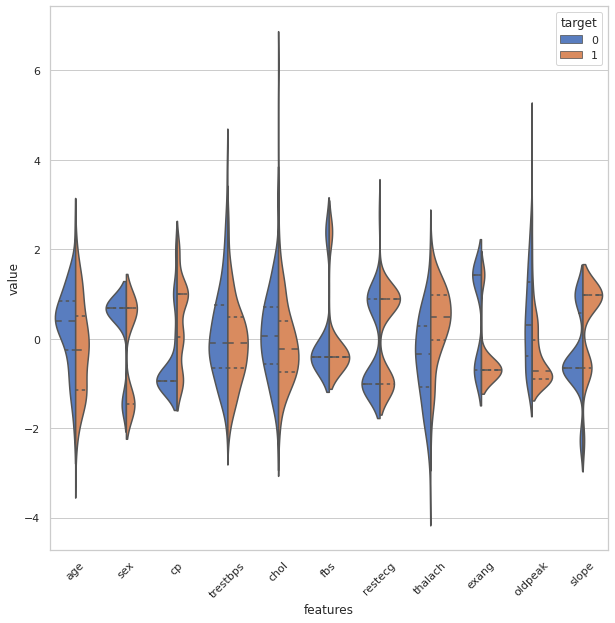

In [ ]:
# Violin plots 

# first 11 features
heart_target = y
heart = x
heart_n = (heart - heart.mean()) / (heart.std())              # standardization
heart = pd.concat([y,heart_n.iloc[:,0:11]],axis=1)
heart = pd.melt(heart,id_vars="target",
                    var_name="features",
                    value_name='value')
print(heart)
plt.figure(figsize=(10,10))
sns.violinplot(data= heart,x="features", y="value", hue="target",split=True, inner="quart")
plt.xticks(rotation=45);

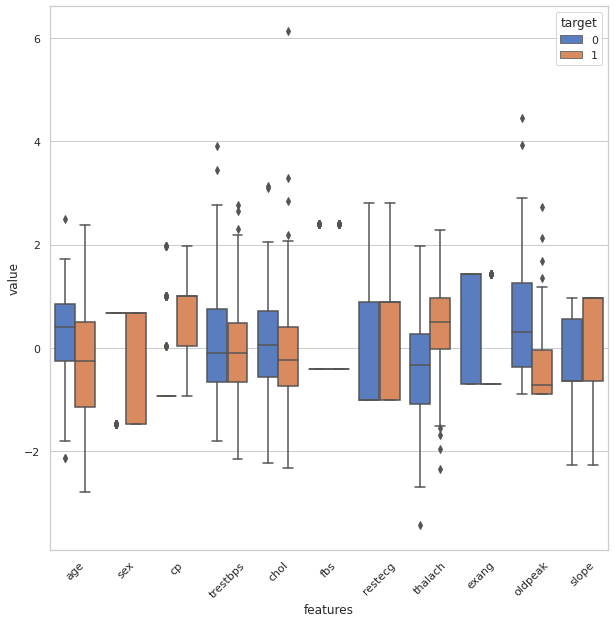

In [ ]:
# As an alternative of violin plot, box plot can be used
# box plots are also useful in terms of seeing outliers
# I do not visualize all features with box plot
# In order to show you lets have an example of box plot
# If you want, you can visualize other features as well.
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="target", data=heart)
plt.xticks(rotation=45);

### Tâche 6:  Utilisation des graphiques conjoints pour la comparaison des caractéristiques

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



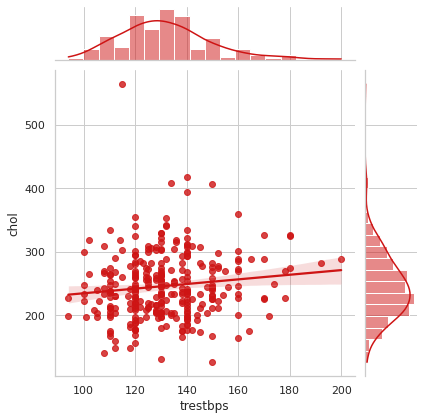

In [ ]:
sns.jointplot(x.loc[:,'trestbps'],
              x.loc[:,'chol'],
              kind="reg",
              color="#ce1414");

### Task 7 :Observation de la distribution des valeurs et de leur variance avec Swarm Plots

      target features     value
0          1      age  0.950624
1          1      age -1.912150
2          1      age -1.471723
3          1      age  0.179877
4          1      age  0.289984
...      ...      ...       ...
3328       0    slope -0.648041
3329       0    slope -0.648041
3330       0    slope -0.648041
3331       0    slope -0.648041
3332       0    slope -0.648041

[3333 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

92.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

85.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

31.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:

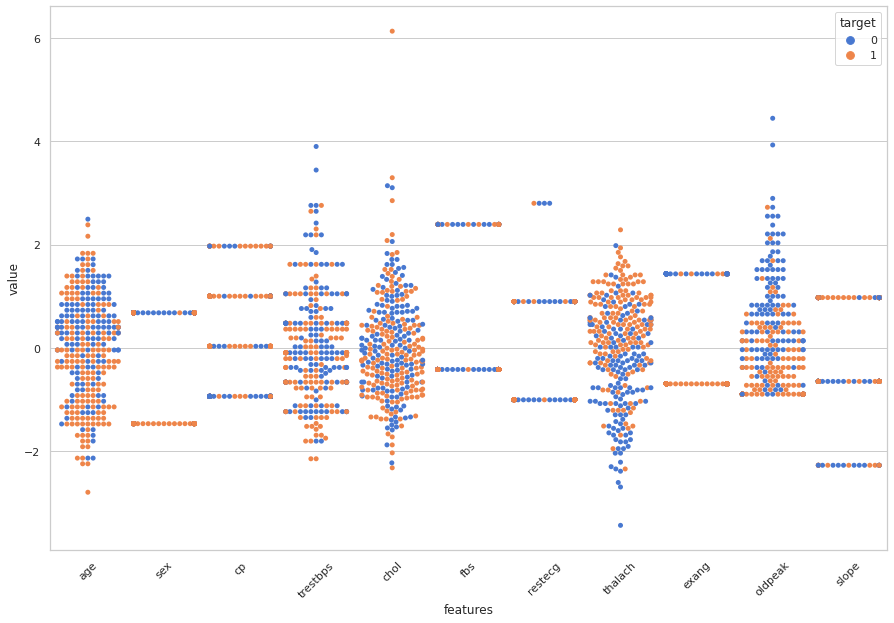

In [ ]:
sns.set(style="whitegrid", palette="muted")
heart_target = y
heart = x
heart_n = (heart - heart.mean()) / (heart.std())              # standardization
heart = pd.concat([y,heart_n.iloc[:,0:11]],axis=1)
heart = pd.melt(heart,id_vars="target",
                    var_name="features",
                    value_name='value')
print(heart)
plt.figure(figsize=(15,10))
sns.swarmplot(data= heart,x="features", y="value", hue="target")
plt.xticks(rotation=45);

### Task 8: Observer toutes les corrélations par paires


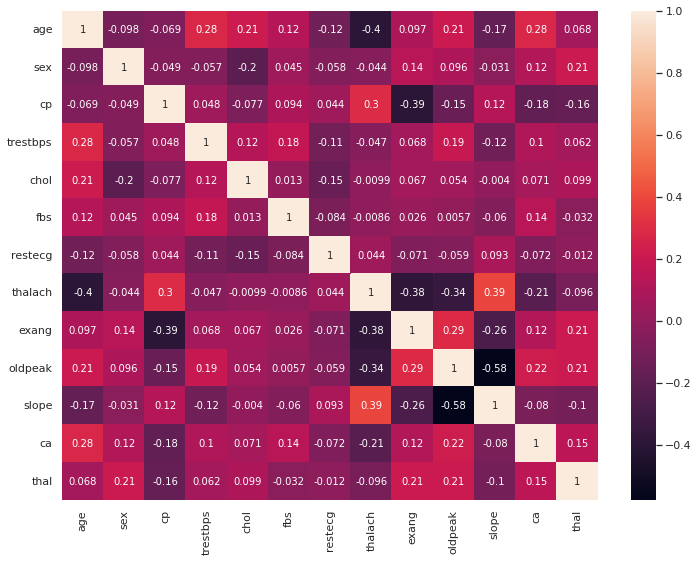

In [ ]:
#correlation map
plt.figure(figsize=(12, 9))
sns.heatmap(x.corr(), annot = True,annot_kws={'size': 10})